# E-commerce User Journey & Funnel Analysis

### Why do thousands of users add products to their carts but never complete the purchase?
### Where in the customer journey do we lose the most users—during browsing, adding to cart, or at checkout?
### Which product categories face the highest drop-offs, and how do these patterns impact overall revenue?

### In this project, I explore an e-commerce dataset to answer these questions from product views to purchases by mapping the user journey into a conversion funnel. Using funnel charts, heatmaps, and Sankey diagrams, I highlight where customers abandon the process and provide actionable insights to improve conversions and enhance user engagement.

#### Dataset link: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy import stats
%matplotlib inline

# Data Information

## Dataset Overview:
### This dataset captures global layoffs from 2020 to April 2025, covering multiple industries, company stages, and countries. It provides insights into workforce reductions, allowing us to explore patterns across time, geography, industry, and funding levels.
### Dataset Source: Kaggle / Public dataset
### Dateset Link: https://www.kaggle.com/datasets/swaptr/layoffs-2022
### Total Records: 4,150
### Columns: 11
### Key features: date, total layoffs, % layoffs, country, location, industry, company, stag

In [2]:
oct_df = pd.read_csv('2019-oct.csv', nrows = 500000)
oct_df = oct_df.sample(n = 500000, random_state = 42)

In [3]:
oct_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
104241,2019-10-01 04:32:52 UTC,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431
199676,2019-10-01 06:06:39 UTC,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a
140199,2019-10-01 05:11:34 UTC,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911
132814,2019-10-01 05:04:16 UTC,view,26100001,2053013553887052089,NaN,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe
408697,2019-10-01 09:04:19 UTC,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed


In [4]:
nov_df = pd.read_csv('2019-nov.csv', nrows = 500000)
nov_df = nov_df.sample(n = 500000, random_state = 42)

In [5]:
nov_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
104241,2019-11-01 03:57:20 UTC,view,3700800,2053013565983425517,appliances.environment.vacuum,philips,128.68,561394540,0d82ce6c-c81f-475d-a977-723d39e84585
199676,2019-11-01 05:27:02 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,577.89,544828613,e12cc5db-8914-4c34-a52a-c5d70691cb1f
140199,2019-11-01 04:33:55 UTC,view,1307356,2053013558920217191,computers.notebook,asus,360.11,557773679,1c0123bb-c0ad-4267-9b4b-f8a1e0efc7d6
132814,2019-11-01 04:26:38 UTC,view,1004159,2053013555631882655,electronics.smartphone,samsung,1253.09,536305001,0f0255ed-527d-4f68-b821-70a7d2939c9f
408697,2019-11-01 08:08:45 UTC,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.08,540186874,5e40c1c7-ef4f-4b03-b5d9-100425eae5fe


In [6]:
df = pd.concat([oct_df, nov_df], axis = 0, ignore_index = True)

In [7]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:32:52 UTC,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431
1,2019-10-01 06:06:39 UTC,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a
2,2019-10-01 05:11:34 UTC,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911
3,2019-10-01 05:04:16 UTC,view,26100001,2053013553887052089,NaN,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe
4,2019-10-01 09:04:19 UTC,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed


In [8]:
df.shape

(1000000, 9)

In [9]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1000000 non-null  object 
 1   event_type     1000000 non-null  object 
 2   product_id     1000000 non-null  int64  
 3   category_id    1000000 non-null  int64  
 4   category_code  679189 non-null   object 
 5   brand          853358 non-null   object 
 6   price          1000000 non-null  float64
 7   user_id        1000000 non-null  int64  
 8   user_session   1000000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 68.7+ MB


In [11]:
df.describe()

,product_id,category_id,price,user_id
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,1.037560e+07,2.056818e+18,291.406639,5.331385e+08
std,1.149004e+07,1.715380e+16,357.010700,1.854266e+07
min,1.000978e+06,2.053014e+18,0.000000,2.449511e+08
25%,1.005153e+06,2.053014e+18,64.610000,5.158040e+08
50%,5.100376e+06,2.053014e+18,162.170000,5.284262e+08
75%,1.570018e+07,2.053014e+18,360.200000,5.505168e+08
max,6.050001e+07,2.180737e+18,2574.070000,5.663943e+08


In [12]:
df.describe(include = 'all')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,1000000,1000000,1.000000e+06,1.000000e+06,679189,853358,1000000.000000,1.000000e+06,1000000
unique,62438,3,NaN,NaN,126,2684,NaN,NaN,239236
top,2019-11-01 06:30:34 UTC,view,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,4488e77a-9901-4c4b-b162-47a224ceab51
freq,81,964475,NaN,NaN,271657,123049,NaN,NaN,504
mean,NaN,NaN,1.037560e+07,2.056818e+18,NaN,NaN,291.406639,5.331385e+08,NaN
std,NaN,NaN,1.149004e+07,1.715380e+16,NaN,NaN,357.010700,1.854266e+07,NaN
min,NaN,NaN,1.000978e+06,2.053014e+18,NaN,NaN,0.000000,2.449511e+08,NaN
25%,NaN,NaN,1.005153e+06,2.053014e+18,NaN,NaN,64.610000,5.158040e+08,NaN
50%,NaN,NaN,5.100376e+06,2.053014e+18,NaN,NaN,162.170000,5.284262e+08,NaN
75%,NaN,NaN,1.570018e+07,2.053014e+18,NaN,NaN,360.200000,5.505168e+08,NaN


In [13]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    320811
brand            146642
price                 0
user_id               0
user_session          0
dtype: int64

<Axes: >

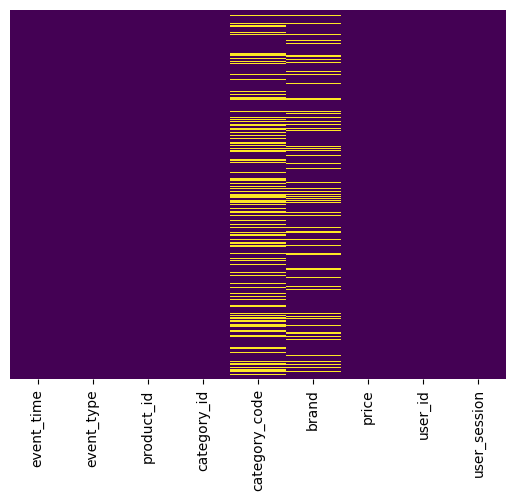

In [14]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Data Cleaning and Preprocessing

## Checking Duplicates

In [15]:
df.duplicated().sum()

np.int64(523)

In [16]:
df.duplicated(subset = ['event_time', 'event_type','product_id','user_id','user_session']).sum()

np.int64(523)

In [17]:
df[df.duplicated(subset = ['event_time','event_type','product_id','user_id','user_session'], keep = False)].head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3009,2019-10-01 08:51:44 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,254.26,546907969,24b99289-5b3e-43ff-8eee-f00bc4bdc86d
3222,2019-10-01 10:06:23 UTC,cart,1004739,2053013555631882655,electronics.smartphone,xiaomi,197.43,555314417,a3c6a4f5-996e-4f8d-adb4-9aae8edd5dac
3725,2019-10-01 10:14:21 UTC,view,3701359,2053013565983425517,appliances.environment.vacuum,bosch,181.34,555581403,d6307980-1850-4ba2-9313-9a65e31f1923
5413,2019-10-01 08:40:56 UTC,cart,1004258,2053013555631882655,electronics.smartphone,apple,733.81,549976758,235bb025-285f-4310-b17c-60b1ccdceb4f
13004,2019-10-01 08:51:50 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,254.26,546907969,24b99289-5b3e-43ff-8eee-f00bc4bdc86d
13472,2019-10-01 08:21:22 UTC,cart,1004858,2053013555631882655,electronics.smartphone,samsung,133.81,551067897,128ced3c-7afd-4e77-9771-d831453de7f6
14416,2019-10-01 07:22:08 UTC,cart,1004838,2053013555631882655,electronics.smartphone,oppo,179.35,525197354,72670bbf-8aaa-4b21-9c4b-d1bcad667c1f
14744,2019-10-01 06:44:56 UTC,view,1004209,2053013555631882655,electronics.smartphone,samsung,95.21,555516663,41965dc5-74c9-492e-b9b4-c1d967ca5654
16911,2019-10-01 08:51:22 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,254.26,546907969,24b99289-5b3e-43ff-8eee-f00bc4bdc86d
17981,2019-10-01 05:54:54 UTC,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,514110288,cd33c3e4-fb93-4302-8205-1f8b97ce13aa


In [18]:
df = df.drop_duplicates(subset = ['event_time','event_type','product_id','user_id','user_session'])

In [19]:
df.duplicated().sum()

np.int64(0)

## Data Standardization

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999477 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     999477 non-null  object 
 1   event_type     999477 non-null  object 
 2   product_id     999477 non-null  int64  
 3   category_id    999477 non-null  int64  
 4   category_code  678774 non-null  object 
 5   brand          852850 non-null  object 
 6   price          999477 non-null  float64
 7   user_id        999477 non-null  int64  
 8   user_session   999477 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 76.3+ MB


In [21]:
df['event_time'] = df['event_time'].apply(lambda x: str(x).replace(' UTC',''))

In [22]:
# df['event_time'] = pd.to_datetime(df['event_time'], errors = 'coerce')

In [23]:
df['event_time'] = pd.to_datetime(df['event_time'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [24]:
df['event_time'].head()

0   2019-10-01 04:32:52
1   2019-10-01 06:06:39
2   2019-10-01 05:11:34
3   2019-10-01 05:04:16
4   2019-10-01 09:04:19
Name: event_time, dtype: datetime64[ns]

In [25]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a
2,2019-10-01 05:11:34,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911
3,2019-10-01 05:04:16,view,26100001,2053013553887052089,NaN,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe
4,2019-10-01 09:04:19,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed


In [26]:
df['event_hour'] = df['event_time'].dt.hour

In [27]:
df['weekday'] = df['event_time'].dt.weekday

In [28]:
df['event_hour'].unique()

array([ 4,  6,  5,  9,  2,  8,  7,  3, 10,  0,  1], dtype=int32)

In [29]:
df['weekday'].value_counts().sort_index()

weekday
1    499712
4    499765
Name: count, dtype: int64

## Note on weekend feature:
- The original dataseet subset contains only transactions on **Tuesday and Friday**
9- For analysis purposes:
  - **Tuesday** is treated as **weekday** (0)
  - **Friday** is treated as **weekend** (1)
- This assumption is made solely to enable meaningful comparisons between weekend and weekday sales.

In [30]:
df['is_weekend'] = df['event_time'].dt.weekday.apply(lambda x: 0 if x == 1 else 1)

In [31]:
df['is_weekend'].value_counts()

is_weekend
1    499765
0    499712
Name: count, dtype: int64

In [32]:
df['event_month'] = df['event_time'].dt.month_name().str[:3]

In [33]:
df['event_month'].value_counts()

event_month
Nov    499765
Oct    499712
Name: count, dtype: int64

In [34]:
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_hour,weekday,is_weekend,event_month
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431,4,1,0,Oct
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a,6,1,0,Oct


In [35]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    320703
brand            146627
price                 0
user_id               0
user_session          0
event_hour            0
weekday               0
is_weekend            0
event_month           0
dtype: int64

In [36]:
df['category_code'] = df['category_code'].astype(str).str.strip().replace(['nan','None','NaN',''], np.nan)

In [37]:
df['brand'] = df['brand'].astype(str).str.strip().replace(['nan','None','NaN',''], np.nan)

In [38]:
cat_map = df.dropna(subset=['category_code']).drop_duplicates('category_id')
cat_dict = dict(zip(cat_map['category_id'], cat_map['category_code']))

In [39]:
df['category_code'] = df['category_code'].fillna(df['category_id'].map(cat_dict))

In [40]:
def fill_mode(s):
    m = s.mode()
    return s.fillna(m.iloc[0]) if not m.empty else s
df['category_code'] = df.groupby('product_id')['category_code'].transform(fill_mode)

In [41]:
df['brand'] = df.groupby('product_id')['brand'].transform(fill_mode)

In [42]:
df['category_code'] = df['category_code'].fillna('Unknown')

In [43]:
df['brand'] = df['brand'].fillna('NoBrand')

In [44]:
df['category_code'].isnull().sum()     

np.int64(0)

In [45]:
df['brand'].isnull().sum()

np.int64(0)

### Raw data contained missing values in category_code and brand. Attempted logical imputation via category_id and product_id, but due to inconsistencies, remaining missing values were replaced with 'unknown' and 'NoBrand' to prevent data integrity.

In [46]:
df.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_hour,weekday,is_weekend,event_month
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,Unknown,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431,4,1,0,Oct
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a,6,1,0,Oct
2,2019-10-01 05:11:34,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911,5,1,0,Oct
3,2019-10-01 05:04:16,view,26100001,2053013553887052089,Unknown,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe,5,1,0,Oct
4,2019-10-01 09:04:19,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed,9,1,0,Oct


In [47]:
split_cols = df['category_code'].str.split('.', n=2, expand=True)
split_cols.columns = ['main_category','sub_category','sub_sub_category']

In [48]:
df = pd.concat([df, split_cols], axis=1)

In [49]:
# Check
df[['category_code','main_category','sub_category','sub_sub_category']].head(10)

,category_code,main_category,sub_category,sub_sub_category
0,Unknown,Unknown,None,None
1,appliances.kitchen.mixer,appliances,kitchen,mixer
2,appliances.kitchen.blender,appliances,kitchen,blender
3,Unknown,Unknown,None,None
4,computers.notebook,computers,notebook,None
5,electronics.smartphone,electronics,smartphone,None
6,electronics.audio.headphone,electronics,audio,headphone
7,computers.peripherals.keyboard,computers,peripherals,keyboard
8,electronics.smartphone,electronics,smartphone,None
9,furniture.living_room.chair,furniture,living_room,chair


In [50]:
df['sub_category'] = df['sub_category'].fillna('Unknown')

In [51]:
df['sub_sub_category'] = df['sub_sub_category'].fillna('Unknown')

In [52]:
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_hour,weekday,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,Unknown,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431,4,1,0,Oct,Unknown,Unknown,Unknown
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a,6,1,0,Oct,appliances,kitchen,mixer


## Removing unnecessary columns

In [53]:
cols_to_drop = ['category_id','user_session','weekday','event_time']
df = df.drop(columns = cols_to_drop)

In [54]:
df.head(2)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer


# EDA with Pandas and Visualization

In [55]:
df.to_csv('layoffs_cleaned.csv', index = False)

In [56]:
df.shape

(999477, 12)

In [57]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [58]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [59]:
df['event_type'].value_counts()

event_type
view        964407
purchase     19352
cart         15718
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\4088294295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


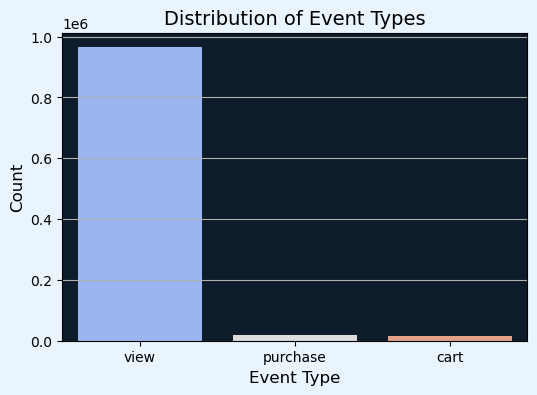

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

sns.countplot(
    x='event_type',
    data=df,
    order=df['event_type'].value_counts().index,
    palette='coolwarm'
)

plt.title("Distribution of Event Types", fontsize=14, color="black")
plt.xlabel("Event Type", fontsize=12, color="black")
plt.ylabel("Count", fontsize=12, color="black")
plt.grid(True, axis = 'y')
plt.show()

In [61]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [62]:
df['price'].describe()

count    999477.000000
mean        291.411901
std         357.031082
min           0.000000
25%          64.610000
50%         162.170000
75%         360.260000
max        2574.070000
Name: price, dtype: float64

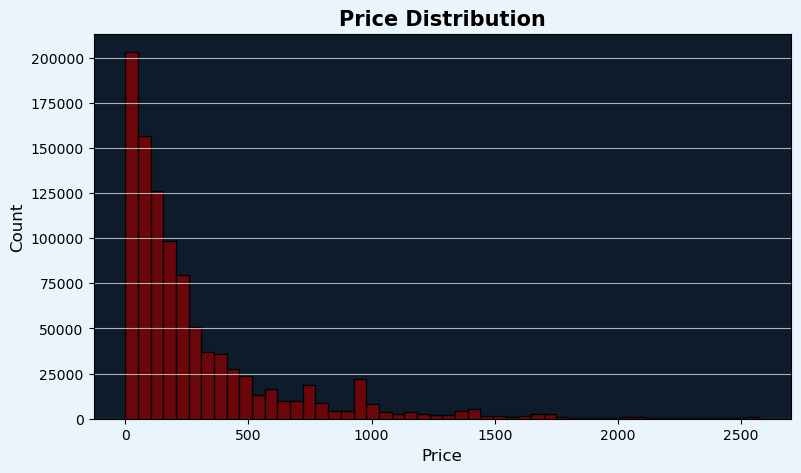

In [63]:
plt.figure(figsize=(9,5))
sns.histplot(df['price'].dropna(), bins=50, color='darkred')

plt.gca().set_facecolor('#0d1b2a')  
plt.gcf().set_facecolor('#eaf4fc')   

plt.title("Price Distribution", fontsize=15, fontweight = 'bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis = 'y')
plt.show()

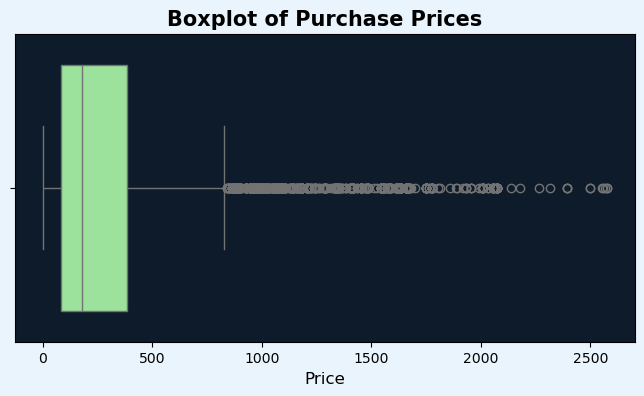

In [64]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df[df['event_type']=='purchase']['price'], color='lightgreen')

plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

plt.title("Boxplot of Purchase Prices", fontsize=15, fontweight = 'bold')
plt.xlabel("Price", fontsize=12)
plt.show()

In [65]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [66]:
top_categories = df['category_code'].value_counts().head(10)
top_categories

category_code
Unknown                             320703
electronics.smartphone              271355
electronics.clocks                   30453
computers.notebook                   27878
electronics.audio.headphone          27096
electronics.video.tv                 24263
appliances.environment.vacuum        18966
appliances.kitchen.refrigerators     18602
appliances.kitchen.washer            17722
apparel.shoes                        17367
Name: count, dtype: int64

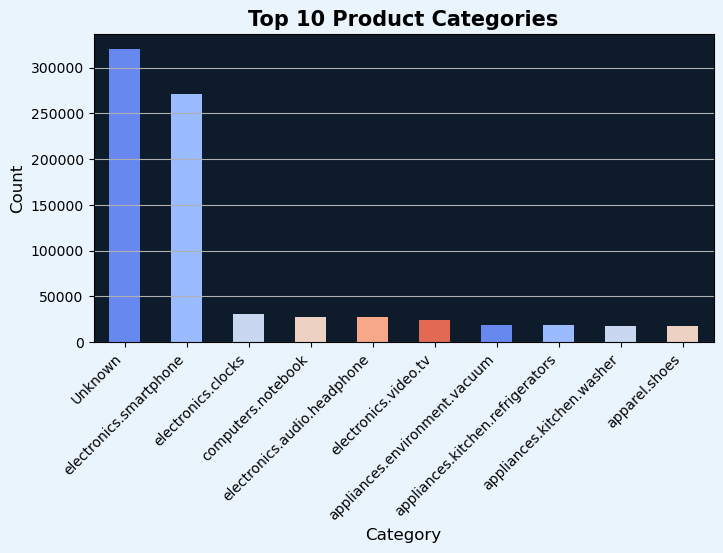

In [67]:
plt.figure(figsize=(8,4))
plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

df['category_code'].value_counts().head(10).plot(
    kind='bar',
    color=sns.color_palette("coolwarm")   
)
plt.title("Top 10 Product Categories", fontsize=15, fontweight = 'bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha = 'right')
plt.grid(True, axis = 'y')
plt.show()

In [68]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [69]:
df['brand'].unique()

array(['matador', 'dauscher', 'philips', ..., 'honda', 'alaskaoriginale',
       'katun'], shape=(2685,), dtype=object)

In [70]:
df['brand'].describe()

count      999477
unique       2685
top       NoBrand
freq       145709
Name: brand, dtype: object

In [71]:
top_brands = df['brand'].value_counts().head(10)
top_brands

brand
NoBrand    145709
samsung    122949
apple      101947
xiaomi      70926
huawei      25463
lucente     16265
bosch       12332
lg          11388
oppo        10708
sony        10279
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\2258288200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="coolwarm")


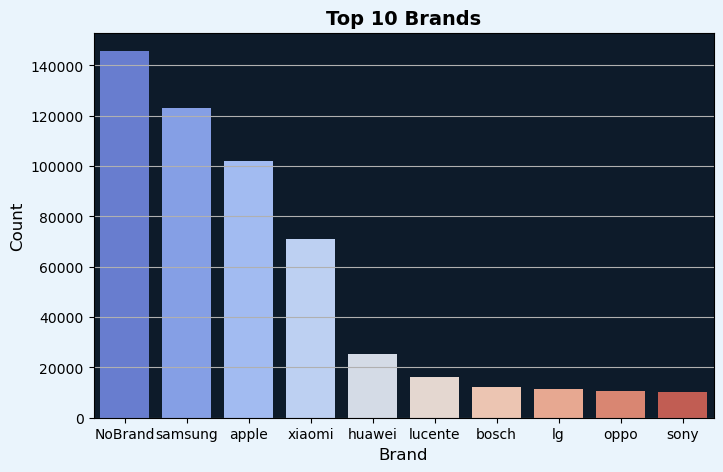

In [72]:
plt.figure(figsize=(8,5))
plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

sns.barplot(x=top_brands.index, y=top_brands.values, palette="coolwarm")
plt.title("Top 10 Brands", fontsize=14, fontweight = 'bold')
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis='y')
plt.show()

In [73]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [74]:
top_product_count = df[df['event_type'] == 'purchase']['product_id'].value_counts().head(10)
top_product_count

product_id
1004856    886
1004767    597
1005115    400
1004833    345
1002544    325
1004870    298
4804056    293
1004249    247
1004836    190
1005105    190
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3310658517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_count.index, y=top_product_count.values, palette="coolwarm")


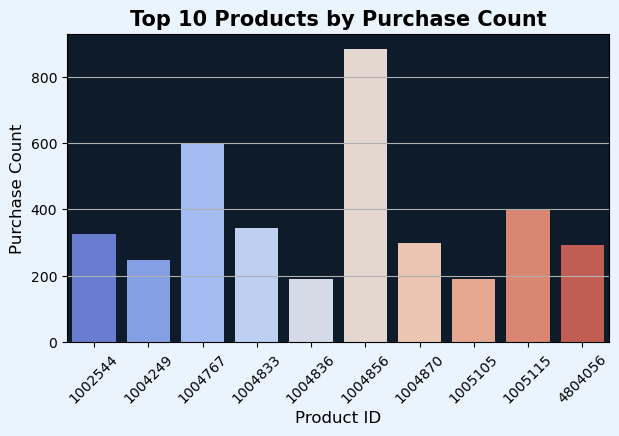

In [75]:
plt.figure(figsize=(7,4))
sns.barplot(x=top_product_count.index, y=top_product_count.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Products by Purchase Count", fontsize=15, fontweight = 'bold')
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Purchase Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.show()

In [76]:
top_products_revenue = df[df['event_type']=='purchase'].groupby('product_id')['price'].sum().sort_values(ascending=False).head(10)
top_products_revenue

product_id
1005115    383855.83
1005105    261518.63
1004249    180287.03
1005135    161784.12
1002544    149955.22
1004767    148648.46
1004856    114829.04
1004870     83797.83
1003317     75540.14
1002524     69788.16
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\1640183569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values, palette="coolwarm")


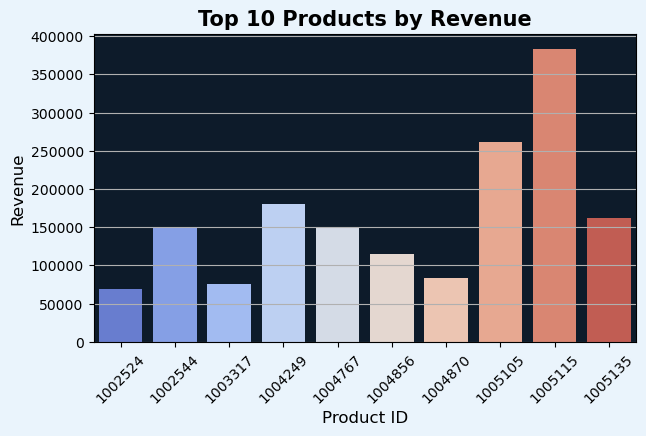

In [77]:
plt.figure(figsize=(7,4))
sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Products by Revenue", fontsize=15, fontweight = 'bold')
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.show()

In [78]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [79]:
hour_counts = df['event_hour'].value_counts().sort_index()
hour_counts

event_hour
0      11970
1      14113
2      55369
3      98732
4     116693
5     136988
6     142331
7     150480
8     153299
9      94209
10     25293
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\1401258147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="coolwarm")


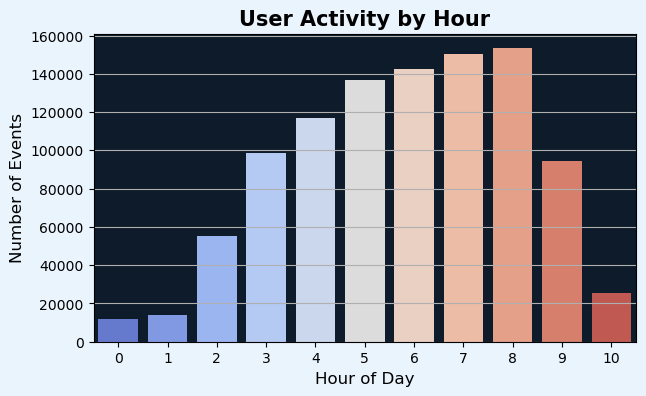

In [80]:
plt.figure(figsize=(7,4))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("User Activity by Hour", fontsize=15, fontweight = 'bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.grid(True, axis = 'y')
plt.show()

In [81]:
weekend_counts = df['is_weekend'].value_counts()
weekend_counts

is_weekend
1    499765
0    499712
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\1389329765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekend_counts.index, y=weekend_counts.values, palette="coolwarm")


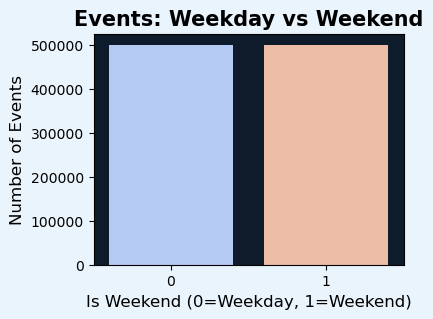

In [82]:
plt.figure(figsize=(4,3))
sns.barplot(x=weekend_counts.index, y=weekend_counts.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Events: Weekday vs Weekend", fontsize=15, fontweight = 'bold')
plt.xlabel("Is Weekend (0=Weekday, 1=Weekend)", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.show()

In [83]:
df.head(3)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender


In [84]:
month_counts = df['event_month'].value_counts()
month_counts

event_month
Nov    499765
Oct    499712
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\126860899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="coolwarm")


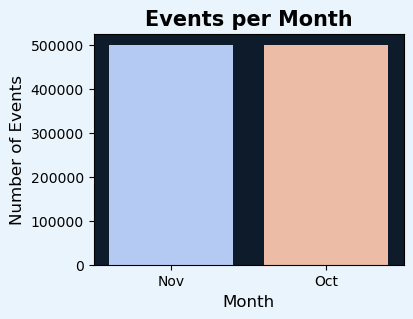

In [85]:
plt.figure(figsize=(4,3))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Events per Month", fontsize=15, fontweight = 'bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.show()

In [86]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [87]:
top_main_categories = df['main_category'].value_counts().head(10)
top_main_categories

main_category
electronics     378485
Unknown         320703
appliances      113646
computers        56661
furniture        36269
apparel          32752
auto             20760
construction     17423
kids             12852
accessories       5149
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\835815311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_main_categories.index, y=top_main_categories.values, palette="coolwarm")


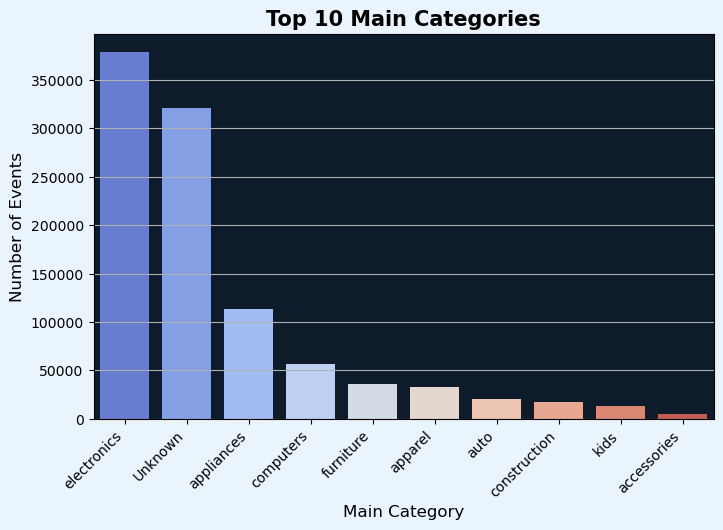

In [88]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_main_categories.index, y=top_main_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Main Categories", fontsize=15, fontweight = 'bold')
plt.xlabel("Main Category", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.show()

In [89]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [90]:
df['sub_category'].describe()

count      999477
unique         58
top       Unknown
freq       320703
Name: sub_category, dtype: object

In [91]:
top_sub_categories = df['sub_category'].value_counts().head(10)
top_sub_categories

sub_category
Unknown        320703
smartphone     271355
kitchen         77947
audio           37400
clocks          30453
environment     30327
notebook        27878
shoes           27120
video           24625
accessories     20760
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3322903513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sub_categories.index, y=top_sub_categories.values, palette="coolwarm")


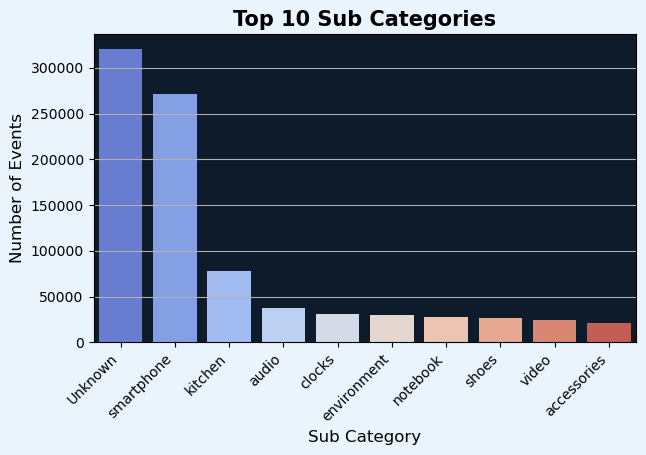

In [92]:
plt.figure(figsize=(7,4))
sns.barplot(x=top_sub_categories.index, y=top_sub_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Sub Categories", fontsize=15, fontweight = 'bold')
plt.xlabel("Sub Category", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.show()

In [93]:
df['sub_sub_category'].describe()

count      999477
unique         84
top       Unknown
freq       728342
Name: sub_sub_category, dtype: object

In [94]:
top_sub_sub_categories = df['sub_sub_category'].value_counts().head(10)
top_sub_sub_categories

sub_sub_category
Unknown          728342
headphone         27096
tv                24263
vacuum            18966
refrigerators     18602
washer            17722
bed                9936
cabinet            9840
player             9555
keds               8987
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3450689111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sub_sub_categories.index, y=top_sub_sub_categories.values, palette="coolwarm")


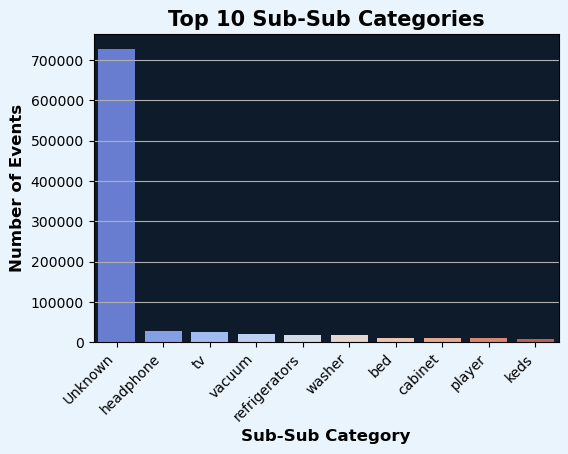

In [95]:
plt.figure(figsize=(6,4))
sns.barplot(x=top_sub_sub_categories.index, y=top_sub_sub_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Sub-Sub Categories", fontsize=15, fontweight = 'bold')
plt.xlabel("Sub-Sub Category", fontsize=12, fontweight = 'bold')
plt.ylabel("Number of Events", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.show()

In [96]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [97]:
category_event = df.groupby(['category_code', 'event_type']).size().unstack(fill_value = 0)
category_event.head()

event_type,cart,purchase,view
category_code,,,
Unknown,1675,4626,314402
accessories.bag,0,32,4020
accessories.umbrella,0,1,106
accessories.wallet,0,9,981
apparel.belt,0,1,50


In [98]:
top_categories = category_event.sum(axis=1).sort_values(ascending=False).head(10)
top_categories

category_code
Unknown                             320703
electronics.smartphone              271355
electronics.clocks                   30453
computers.notebook                   27878
electronics.audio.headphone          27096
electronics.video.tv                 24263
appliances.environment.vacuum        18966
appliances.kitchen.refrigerators     18602
appliances.kitchen.washer            17722
apparel.shoes                        17367
dtype: int64

In [99]:
top_category_event = category_event.loc[top_categories.index]
top_category_event

event_type,cart,purchase,view
category_code,,,
Unknown,1675,4626,314402
electronics.smartphone,10853,8986,251516
electronics.clocks,353,425,29675
computers.notebook,76,368,27434
electronics.audio.headphone,968,813,25315
electronics.video.tv,475,507,23281
appliances.environment.vacuum,210,310,18446
appliances.kitchen.refrigerators,59,267,18276
appliances.kitchen.washer,104,350,17268


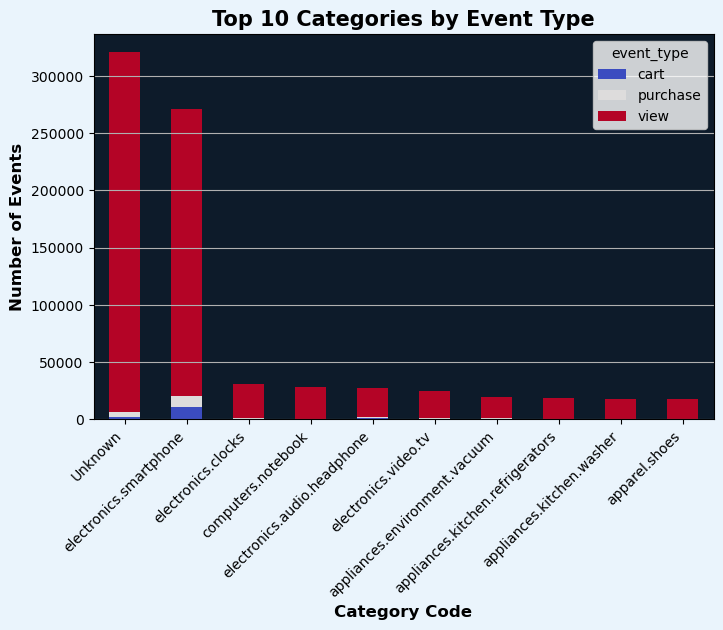

In [100]:
top_category_event.plot(kind='bar', figsize=(8,5), stacked=True, colormap='coolwarm')

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Categories by Event Type", fontsize=15, fontweight = 'bold')
plt.xlabel("Category Code", fontsize=12, fontweight = 'bold')
plt.ylabel("Number of Events", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.show()

In [101]:
top_cart_categories = df[df['event_type'] == 'cart']['category_code'].value_counts().head(10)
top_cart_categories

category_code
electronics.smartphone           10853
Unknown                           1675
electronics.audio.headphone        968
electronics.video.tv               475
electronics.clocks                 353
appliances.environment.vacuum      210
appliances.kitchen.washer          104
electronics.telephone              104
electronics.tablet                  92
auto.accessories.alarm              88
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\514317552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cart_categories.index, y=top_cart_categories.values, palette="coolwarm")


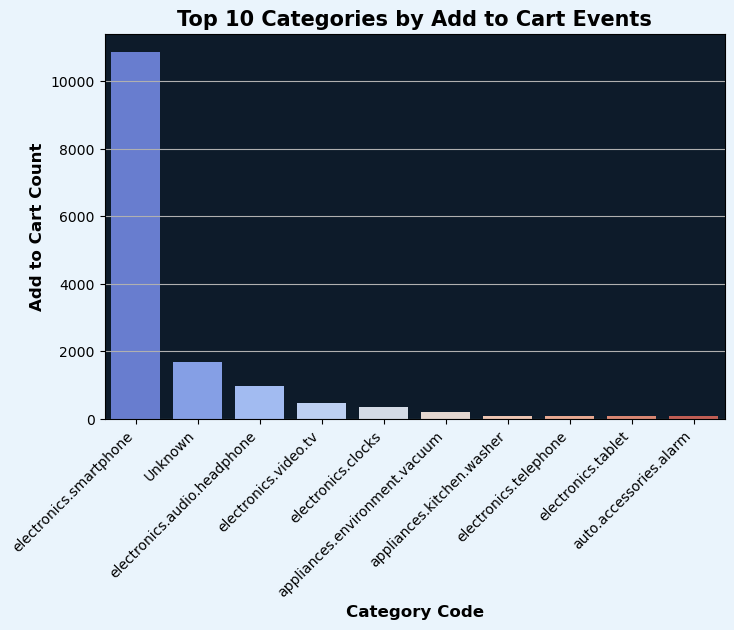

In [102]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_cart_categories.index, y=top_cart_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')  
plt.gcf().set_facecolor('#eaf4fc')  

plt.title("Top 10 Categories by Add to Cart Events", fontsize=15, fontweight = 'bold')
plt.xlabel("Category Code", fontsize=12, fontweight = 'bold')
plt.ylabel("Add to Cart Count", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.show()

In [103]:
top_purchase_categories = df[df['event_type'] == 'purchase']['category_code'].value_counts().head(10)
top_purchase_categories

category_code
electronics.smartphone              8986
Unknown                             4626
electronics.audio.headphone          813
electronics.video.tv                 507
electronics.clocks                   425
computers.notebook                   368
appliances.kitchen.washer            350
appliances.environment.vacuum        310
appliances.kitchen.refrigerators     267
electronics.tablet                   114
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3534064557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_purchase_categories.index, y=top_purchase_categories.values, palette="coolwarm")


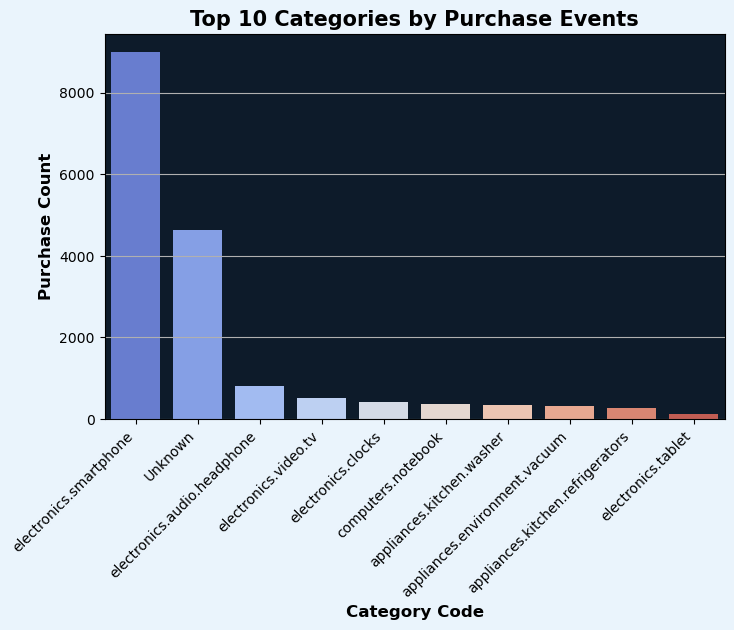

In [104]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_purchase_categories.index, y=top_purchase_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')  
plt.gcf().set_facecolor('#eaf4fc')   

plt.title("Top 10 Categories by Purchase Events", fontsize=15, fontweight = 'bold')
plt.xlabel("Category Code", fontsize=12, fontweight = 'bold')
plt.ylabel("Purchase Count", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.show()

In [105]:
top_cart_brands = df[df['event_type'] == 'cart']['brand'].value_counts().head(10)
top_cart_brands

brand
samsung     5703
apple       4207
xiaomi      2063
huawei       816
oppo         347
cordiant     197
NoBrand      188
nokian       153
sony         148
lg           144
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3311631735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cart_brands.index, y=top_cart_brands.values, palette="coolwarm")


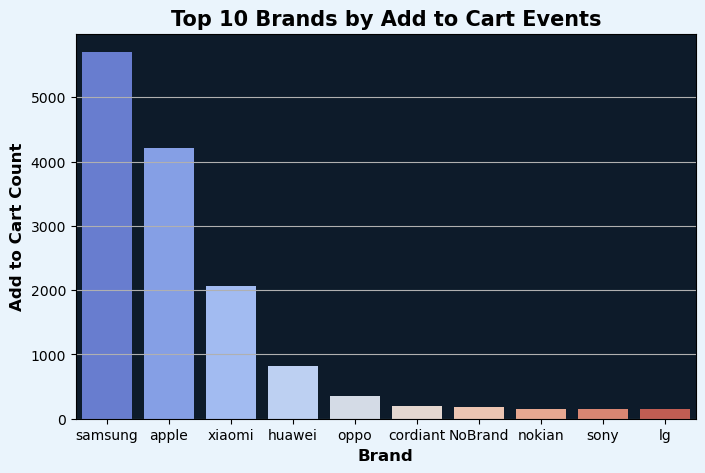

In [106]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_cart_brands.index, y=top_cart_brands.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Brands by Add to Cart Events", fontsize = 15, fontweight = 'bold')
plt.xlabel("Brand", fontsize=12, fontweight = 'bold')
plt.ylabel("Add to Cart Count", fontsize=12, fontweight = 'bold')
plt.grid(True, axis = 'y')
plt.show()

In [107]:
top_purchase_brands = df[df['event_type'] == 'purchase']['brand'].value_counts().head(10)
top_purchase_brands

brand
samsung     4674
apple       3722
NoBrand     1533
xiaomi      1432
huawei       604
lucente      307
cordiant     303
oppo         269
lg           219
artel        186
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\4000800957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_purchase_brands.index, y=top_purchase_brands.values, palette="coolwarm")


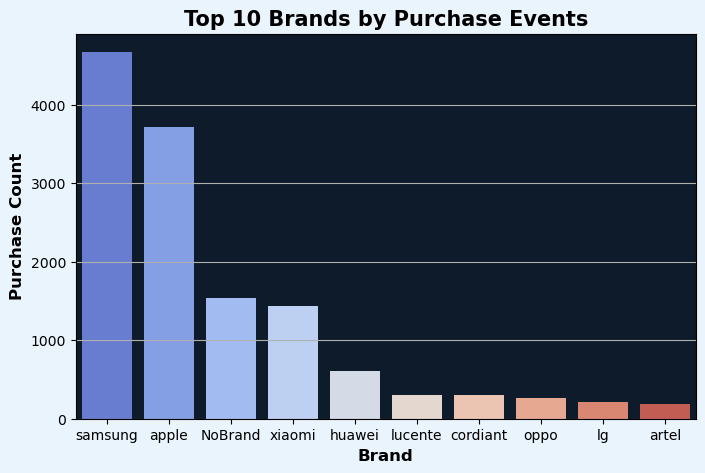

In [108]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_purchase_brands.index, y=top_purchase_brands.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Brands by Purchase Events", fontsize=15, fontweight = 'bold')
plt.xlabel("Brand", fontsize=12, fontweight = 'bold')
plt.ylabel("Purchase Count", fontsize=12, fontweight = 'bold')
plt.grid(True, axis = 'y')
plt.show()

In [109]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [110]:
top_revenue_categories = df[df['event_type']=='purchase'].groupby('category_code')['price'].sum().sort_values(ascending=False).head(10)
top_revenue_categories

category_code
electronics.smartphone              4149343.93
Unknown                              629736.70
computers.notebook                   211935.64
electronics.video.tv                 204464.16
electronics.clocks                   115613.43
appliances.kitchen.washer             96538.44
appliances.kitchen.refrigerators      95848.05
electronics.audio.headphone           92703.08
computers.desktop                     52661.21
appliances.environment.vacuum         40420.44
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3968999976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_categories.index, y=top_revenue_categories.values, palette="coolwarm")


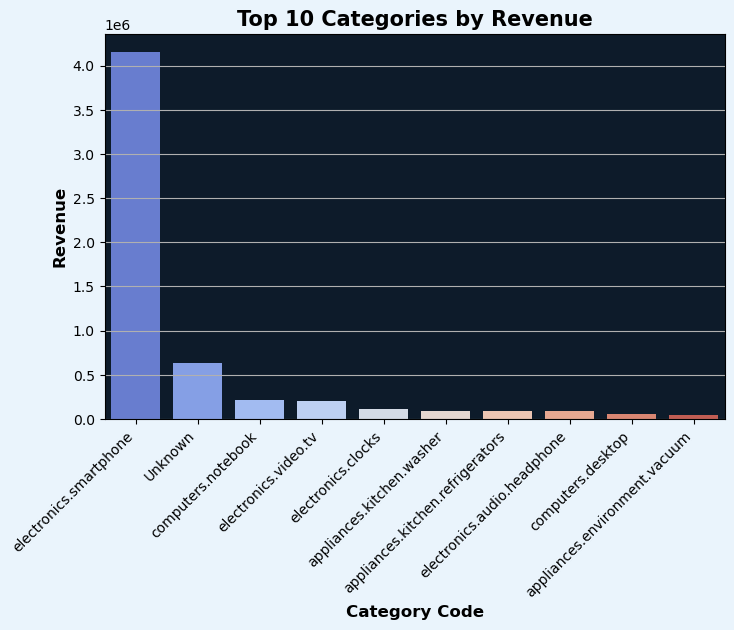

In [111]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_revenue_categories.index, y=top_revenue_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Categories by Revenue", fontsize=15, fontweight = 'bold')
plt.xlabel("Category Code", fontsize=12, fontweight = 'bold')
plt.ylabel("Revenue", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.show()

In [112]:
top_revenue_brands = df[df['event_type']=='purchase'].groupby('brand')['price'].sum().sort_values(ascending=False).head(10)
top_revenue_brands

brand
apple      2913085.37
samsung    1254976.02
NoBrand     230284.37
xiaomi      224154.41
huawei      123227.54
lucente      88040.13
lg           85496.67
acer         80873.64
sony         62834.40
oppo         59103.44
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3857416724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_brands.index, y=top_revenue_brands.values, palette="coolwarm")


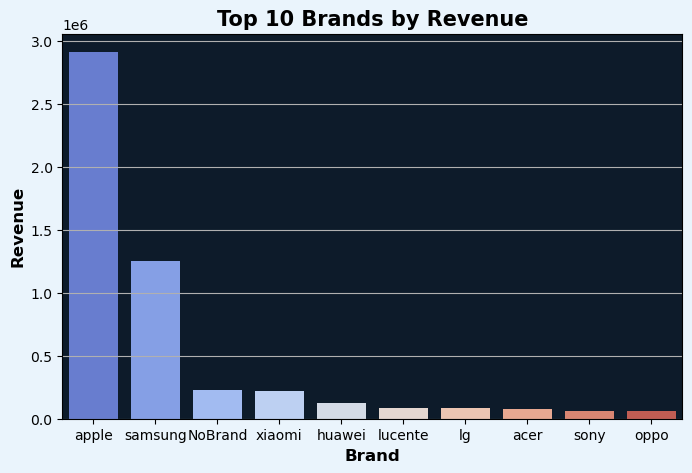

In [113]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_revenue_brands.index, y=top_revenue_brands.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a') 
plt.gcf().set_facecolor('#eaf4fc')  

plt.title("Top 10 Brands by Revenue", fontsize=15, fontweight = 'bold')
plt.xlabel("Brand", fontsize=12, fontweight = 'bold')
plt.ylabel("Revenue", fontsize=12, fontweight = 'bold')
plt.grid(True, axis = 'y')
plt.show()

In [114]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [115]:
monthly_revenue = df[df['event_type']=='purchase'].groupby(df['event_month'])['price'].sum()
monthly_revenue

event_month
Nov    2897621.42
Oct    3115433.59
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3528079404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="coolwarm")


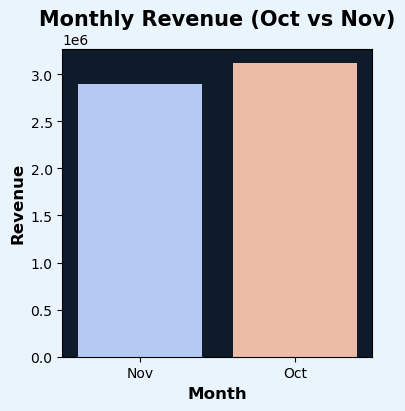

In [116]:
plt.figure(figsize=(4,4))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Monthly Revenue (Oct vs Nov)", fontsize=15, fontweight = 'bold')
plt.xlabel("Month", fontsize=12, fontweight = 'bold')
plt.ylabel("Revenue", fontsize=12, fontweight = 'bold')
plt.show()

In [117]:
weekday_revenue = df[df['event_type']=='purchase'].groupby('is_weekend')['price'].sum()
weekday_revenue

is_weekend
0    3115433.59
1    2897621.42
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\3651784986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_revenue.index.map({0:'Weekday',1:'Weekend'}),


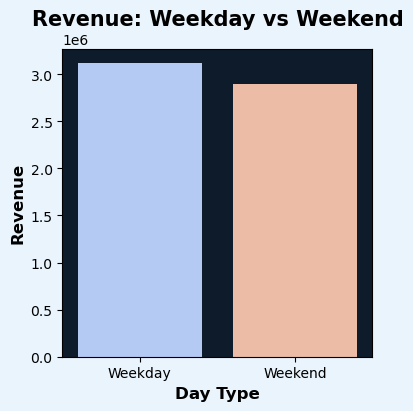

In [118]:
plt.figure(figsize=(4,4))
sns.barplot(x=weekday_revenue.index.map({0:'Weekday',1:'Weekend'}),
            y=weekday_revenue.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Revenue: Weekday vs Weekend", fontsize=15, fontweight = 'bold')
plt.xlabel("Day Type", fontsize=12, fontweight = 'bold')
plt.ylabel("Revenue", fontsize=12, fontweight = 'bold')
plt.show()

In [119]:
hourly_revenue = df[df['event_type']=='purchase'].groupby(df['event_hour'])['price'].sum()
hourly_revenue

event_hour
0       41665.50
1       36209.35
2      198715.34
3      492641.34
4      689819.81
5      875028.40
6      905996.27
7      915733.89
8     1003718.93
9      657964.52
10     195561.66
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\2138625990.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker="o", palette = 'coolwarm')


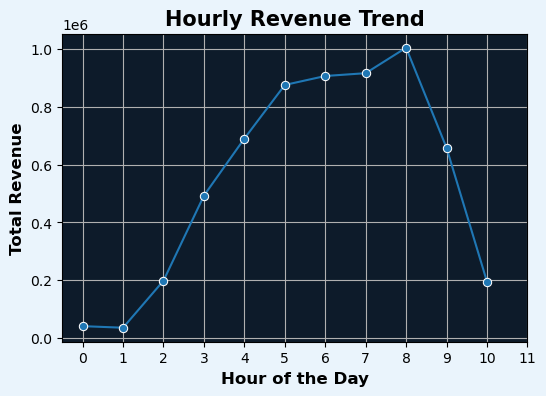

In [120]:
plt.figure(figsize=(6,4))
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker="o", palette = 'coolwarm')

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Hourly Revenue Trend", fontsize=15, fontweight = 'bold')
plt.xlabel("Hour of the Day", fontsize=12, fontweight = 'bold')
plt.ylabel("Total Revenue", fontsize=12,fontweight = 'bold')
plt.xticks(range(0,12))
plt.grid(True)
plt.show()

In [121]:
df.head()

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown
4,view,1306569,computers.notebook,acer,1055.11,517726252,9,0,Oct,computers,notebook,Unknown


In [122]:
funnel = df['event_type'].value_counts()
funnel

event_type
view        964407
purchase     19352
cart         15718
Name: count, dtype: int64

In [123]:
funnel_conversion = {
    "View → Cart": round((funnel['cart'] / funnel['view']) * 100, 2),
    "Cart → Purchase": round((funnel['purchase'] / funnel['cart']) * 100, 2),
    "View → Purchase": round((funnel['purchase'] / funnel['view']) * 100, 2)
}
funnel_conversion

{'View → Cart': np.float64(1.63),
 'Cart → Purchase': np.float64(123.12),
 'View → Purchase': np.float64(2.01)}

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_26288\1019118142.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Stage", y="Conversion Rate (%)", data=conv_df, palette="coolwarm")


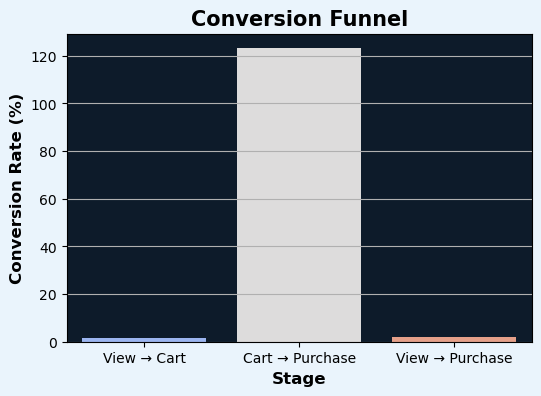

In [124]:
conv_df = pd.DataFrame(list(funnel_conversion.items()), columns=["Stage", "Conversion Rate (%)"])

plt.figure(figsize=(6,4))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

sns.barplot(x="Stage", y="Conversion Rate (%)", data=conv_df, palette="coolwarm")

plt.title("Conversion Funnel", fontsize=15, fontweight = 'bold')
plt.xlabel("Stage", fontsize=12, fontweight = 'bold')
plt.ylabel("Conversion Rate (%)", fontsize=12, fontweight = 'bold')
plt.grid(True, axis = 'y')
plt.show()

In [125]:
funnel_users = df.groupby('event_type')['user_id'].nunique()
funnel_users = funnel_users[['view', 'cart', 'purchase']]  
funnel_users

event_type
view        177621
cart          8883
purchase     14584
Name: user_id, dtype: int64

In [126]:
# Step-to-step conversion rates
conv_view_to_cart = (funnel_users['cart'] / funnel_users['view']) * 100
conv_cart_to_purchase = (funnel_users['purchase'] / funnel_users['cart']) * 100

# Drop-offs
drop_view_to_cart = 100 - conv_view_to_cart
drop_cart_to_purchase = 100 - conv_cart_to_purchase

print("View → Cart Conversion:", round(conv_view_to_cart, 2), "%")
print("View → Cart Drop-off:", round(drop_view_to_cart, 2), "%\n")

print("Cart → Purchase Conversion:", round(conv_cart_to_purchase, 2), "%")
print("Cart → Purchase Drop-off:", round(drop_cart_to_purchase, 2), "%")

View → Cart Conversion: 5.0 %
View → Cart Drop-off: 95.0 %

Cart → Purchase Conversion: 164.18 %
Cart → Purchase Drop-off: -64.18 %


In [129]:
stages = ['View → Cart', 'Cart → Purchase']
dropoffs = [drop_view_to_cart, drop_cart_to_purchase]
dropoffs

[np.float64(94.99890215683956), np.float64(-64.17876843408757)]

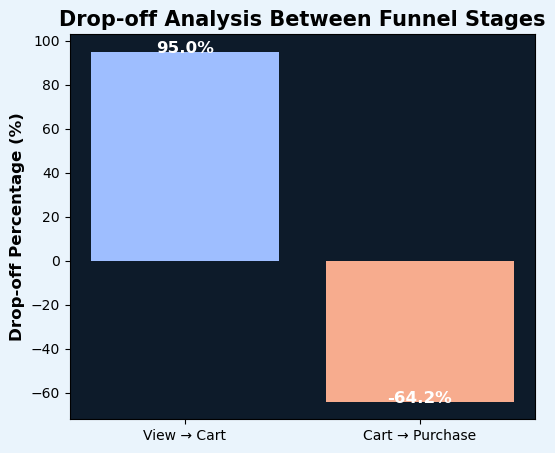

In [132]:
plt.figure(figsize=(6,5))
bars = plt.bar(stages, dropoffs, color=plt.cm.coolwarm([0.3, 0.7]))

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

# Annotate bars
for bar, val in zip(bars, dropoffs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-2,
             f"{val:.1f}%", ha='center', va='bottom', color='white', fontsize=12, weight='bold')

plt.title("Drop-off Analysis Between Funnel Stages", fontsize=15, fontweight = 'bold')
plt.ylabel("Drop-off Percentage (%)", fontsize=12, fontweight = 'bold')
plt.show()

In [145]:
category_funnel = (
    df.groupby(['main_category', 'event_type'])['user_id']
      .nunique()
      .unstack(fill_value=0)
      [['view', 'cart', 'purchase']]   
)

category_funnel.head()

event_type,view,cart,purchase
main_category,,,
Unknown,69458,1011,3746
accessories,1585,0,33
apparel,7964,1,132
appliances,21841,369,1563
auto,4885,89,182


In [146]:
# Conversion rates
category_funnel['conv_view_to_cart'] = (category_funnel['cart'] / category_funnel['view']) * 100
category_funnel['conv_cart_to_purchase'] = (category_funnel['purchase'] / category_funnel['cart']) * 100

# Drop-off %
category_funnel['drop_view_to_cart'] = 100 - category_funnel['conv_view_to_cart']
category_funnel['drop_cart_to_purchase'] = 100 - category_funnel['conv_cart_to_purchase']

category_funnel[['drop_view_to_cart', 'drop_cart_to_purchase']].head()

event_type,drop_view_to_cart,drop_cart_to_purchase
main_category,,
Unknown,98.544444,-2.705242e+02
accessories,100.000000,-inf
apparel,99.987443,-1.310000e+04
appliances,98.310517,-3.235772e+02
auto,98.178096,-1.044944e+02


In [147]:
top_drop = category_funnel.sort_values('drop_cart_to_purchase', ascending=False).head(10)
top_drop

event_type,view,cart,purchase,conv_view_to_cart,conv_cart_to_purchase,drop_view_to_cart,drop_cart_to_purchase
main_category,,,,,,,
electronics,83684,7255,8367,8.669519,115.327360,91.330481,-15.327360
auto,4885,89,182,1.821904,204.494382,98.178096,-104.494382
construction,3877,71,175,1.831313,246.478873,98.168687,-146.478873
Unknown,69458,1011,3746,1.455556,370.524233,98.544444,-270.524233
stationery,61,1,4,1.639344,400.000000,98.360656,-300.000000
appliances,21841,369,1563,1.689483,423.577236,98.310517,-323.577236
computers,10694,127,576,1.187582,453.543307,98.812418,-353.543307
country_yard,148,1,5,0.675676,500.000000,99.324324,-400.000000
medicine,118,1,6,0.847458,600.000000,99.152542,-500.000000


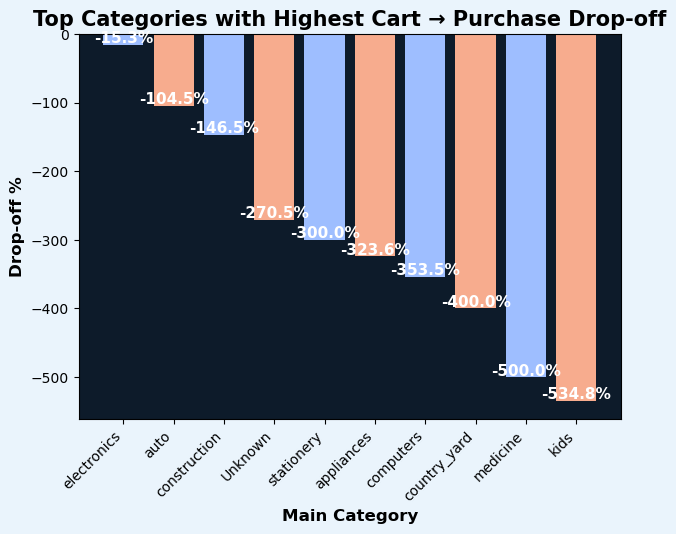

In [149]:
plt.figure(figsize=(7,5))
bars = plt.bar(top_drop.index, top_drop['drop_cart_to_purchase'], color = plt.cm.coolwarm([0.3,0.7]))

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

# Annotate bars
for bar, val in zip(bars, top_drop['drop_cart_to_purchase']):
    plt.text(bar.get_x() + bar.get_width()/2, val-2,
             f"{val:.1f}%", ha='center', va='bottom', color='white', fontsize=11, weight='bold')

plt.title("Top Categories with Highest Cart → Purchase Drop-off", fontsize=15, fontweight = 'bold')
plt.xlabel("Main Category", fontsize=12, fontweight = 'bold')
plt.ylabel("Drop-off %", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [152]:
purchases = df[df['event_type'] == 'purchase']
purchases.head()

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
94,purchase,1004237,electronics.smartphone,apple,1093.95,540514956,9,0,Oct,electronics,smartphone,Unknown
96,purchase,1004857,electronics.smartphone,samsung,130.73,550479339,7,0,Oct,electronics,smartphone,Unknown
110,purchase,1005009,electronics.smartphone,xiaomi,90.34,538085323,7,0,Oct,electronics,smartphone,Unknown
114,purchase,12300305,construction.tools.drill,alteco,25.74,525983558,7,0,Oct,construction,tools,drill
130,purchase,1004856,electronics.smartphone,samsung,130.76,542447601,6,0,Oct,electronics,smartphone,Unknown


In [155]:
user_purchase_counts = purchases.groupby('user_id')['product_id'].count().reset_index()
user_purchase_counts.rename(columns={'product_id': 'purchase_count'}, inplace=True)
user_purchase_counts.head()

,user_id,purchase_count
0,356520186,1
1,397023870,1
2,451971397,1
3,453705583,1
4,457360398,1


In [156]:
user_purchase_counts['is_repeat'] = user_purchase_counts['purchase_count'].apply(lambda x: 1 if x > 1 else 0)

In [157]:
user_purchase_counts['is_repeat']

0        0
1        0
2        0
3        0
4        0
        ..
14579    0
14580    0
14581    0
14582    0
14583    0
Name: is_repeat, Length: 14584, dtype: int64

In [159]:
repeat_summary = user_purchase_counts['is_repeat'].value_counts()
repeat_summary

is_repeat
0    11804
1     2780
Name: count, dtype: int64

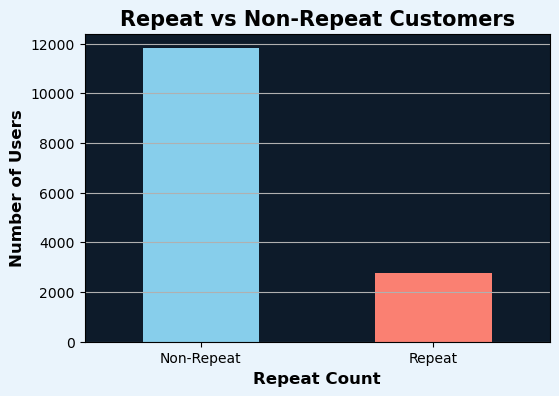

In [167]:
plt.figure(figsize=(6,4))
repeat_summary.plot(kind='bar', color=['skyblue', 'salmon'])

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Repeat vs Non-Repeat Customers", fontsize=15, fontweight='bold')
plt.xticks([0,1], ['Non-Repeat', 'Repeat'], rotation=0, fontsize=10)
plt.xlabel("Repeat Count", fontsize=12, fontweight='bold')
plt.ylabel("Number of Users", fontsize=12, fontweight='bold')
plt.grid(True, axis = 'y')
plt.show()

In [168]:
top_repeat_users = user_purchase_counts.sort_values('purchase_count', ascending=False).head(10)
top_repeat_users

,user_id,purchase_count,is_repeat
11311,554090147,26,1
8477,541311429,23,1
6331,526933626,21,1
10021,548891541,20,1
13778,565969544,17,1
7018,531974857,17,1
8488,541337272,16,1
8486,541328903,16,1
3269,515934670,14,1
13263,562929381,14,1


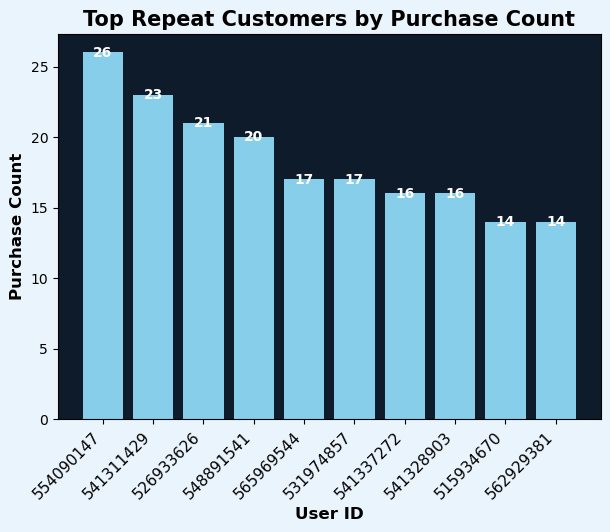

In [175]:
plt.figure(figsize=(7,5))
bars = plt.bar(top_repeat_users['user_id'].astype(str), top_repeat_users['purchase_count'], color='skyblue')


plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top Repeat Customers by Purchase Count", fontsize=15, fontweight='bold')
plt.xlabel("User ID", fontsize=12, fontweight='bold')
plt.ylabel("Purchase Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.5,
             f"{int(bar.get_height())}", ha='center', va='bottom', color='white', fontweight='bold')

plt.show()